# <div style="text-align:center"> DS7333 - Case Study 12 | HIGGS Dataset with Neural Nets</div>
### <div style="text-align:center">Andy Ho, An Nguyen, Jodi Pafford</div>
<div style="text-align:center">July 29, 2019</div>

# Introduction
### The HIGGS data set had 11 million records, the first 10.5 million training and the last 500k, testing.  The first column, ‘Target,’ was used as the Y value and the remaining features the X values. The following is data augmentation approaches:
### a.	Full Training Data: Using 10.5 Million records for the NN
### b.	Scaled Training Data: Using 50k records for the NN.
 

# Discovery and Summary
### To replicate the model  in the paper, we used the following parameters:
- Neurons =  300 (ref: pg 6)
- Layers = 5 (ref: pg 6)
- activation = ’tanh’ (last layer, activation = ‘sigmoid’) (ref: pg 9)
- Optimizer =  Stochastic Gradient Descent (ref: pg 8)
- Learning Rate = 0.05 (ref: pg 6)
- Learning Rate Decay = Factor of 1.0000002 (ref: pg 9)
- Learning Rate Minimum = 0.000001 (ref: pg 9)
- Momentum = .9 to .99
- Loss = MSE
- Metrics = auc (ref: pg 6) - (not able to duplicate auc, but page 14 also used MSE, so we will use that)
- Epochs = 1000 (ref: pg 9)
- Batch size = 100 (ref: pg 9)

The amount of time required to run this model was very long.  We followed the same parameters on our augmented data set of 50k records.  Majority of the parameters were replicated except for 'learning rate minimum' and a ceiling for momentum.  Each epoch averaged 60 seconds - total estimated time of 17hrs to run 1000 epochs at 100 batch size. If we pre-trained on 10.5 million, it would have taken days to complete.  

Using our scaled down data set, the starting MSE was 0.2283 and Accuracy at 63%.  At epoch 30, it had gone down to MSE of 0.165 and Accuracy at 76%.  We did not let it run through to 1000 epochs but believe the MSE would continue to go down towards 0.0885 and accuracy up to 85%.  This would be in line with the paper's results.

## Code to Replicate Paper's Model:
### Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import metrics
from sklearn import datasets
import pandas as pd
import numpy as np
print(tf.__version__)

# Augmented data set used.  50k records
sampled_higgs = pd.read_csv("sampled_higgs.csv", index_col=0)
y = sampled_higgs['Target']
x = sampled_higgs.drop('Target', axis = 1)

In [57]:
# Total of 5 layers for the paper's model.  300 neurons for each hidden layer and 1 neuron for output layer.
model = tf.keras.Sequential()

model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

### Compile

In [2]:
#Learning rate set at 0.05 and the loss function 'mean_squared_error'
opt = tf.keras.optimizers.SGD(lr=0.05, decay=0.010000002, momentum=0.9, nesterov=True)

#SGD is Schocastic Gradient Descent
model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'accuracy'])

### Fit

In [3]:
# 1000 epochs with a batch size of 100
model.fit(scaled_train_df.values, np.asarray(y), epochs=1000, batch_size=100)

### Quantify Results

In [ ]:
#AUC Code
from sklearn.metrics import roc_auc_score
print("AUC:", roc_auc_score(np.asarray(y), model.predict(x.values)))

# Additional Research on  Practices/Procedures
### Since this paper was written in 2014, several new ideas and advancements have been created/discovered. Two major advancements are in the area of Optimizers and Activations.
### Optimizers: 
  Several new optimizers have been created since this paper was written. RMSprop and the Adam (Adaptive Moment Estimation) optimizer are two such ones. In practice today, Stochastic Gradient Descent (SGD) is not used as often as the new ones due to the amount of time it takes to run. Research now shows that rsmProp and the Adam Optimizer both have similar results in a much shorter amount of time. RMSprop uses 'a moving averages of squared gradients to normalize the gradient itself.' This method acts as a balancing of the step size. Adam is an optimizer that works similarly to RMSprop, but Adam also keeps an exponentially decaying average. 
### Activation: 
Since 2014, there are also new activation techniques including ReLu (Rectified Linear Unit), eLu (Exponential Linear Unit), and GeLu (Gaussian Error Linear Unit). ReLu is the most popular activation method and now the 'new normal'. ReLu avoids the vanishing gradient problem that occurs with other common activation functions.

# Quantifying Results
Results from the study were reported in Mean Squared Error (MSE) (pg 14). The lowest MSE that was recorded was 0.0885. The lowest MSE we recorded was 0.15 at Epoch 100 - due to time constraints, we were unable to run 1000 but believe it would have reached the paper's results.

# Our attempts (work flow) to fine-tune our NN.

### Versioning the Data: Depending on the activation function used, we versioned the data:
- Sigmoid: Normalized between 0 to 1
- Tanh: Rescaled to -1 to 1

### NN Knobs adjusted: 
- Learning Rate: The amount that the weights are updated during training which controls how much to change the model in response to the estimated error each time the model weights update.  This is a hyperparameter in NN with values between 0 and 1.  This is probably the most important hyperparameter to tune.  A LR that is too large can cause the model to converge too quickly and too small can cause the model to stall.  We ran our NN using LR = 0.05, 0.01, and 0.001.
- Layers: A NN has 3 types of layers; Input, Hidden, and Output.  Each hidden layer’s task is to approximate the output function.  The more hidden layers are added, the longer it’ll take to learn (i.e. vanishing gradient problem).  We used between 1-5 hidden layers.  
- Activation Function: Used to determine the output of NN.  The two used in this assignment is Sigmoid (0 to 1) and Tanh (-1 to 1).  Sigmoid and Tanh are ideal for probability prediction or logistic prediction.
- Epochs: When an entire dataset is passed forward and backward through the NN once.  
- Batch Size: The number of records passed through the NN forward and backward each pass until the whole dataset is done.  For example, batch size of 500 for a dataset of 5000 means one epoch will have 10 sets of records sent through the NN.
- Optimizer: Algorithms that minimizes (or maximizes) a loss function using gradient values.  Examples are Gradient Descent, Stochastic Gradient Descent (SGD), Mini batch Gradient Descent, Adaptive Moment Estimation (ADAM).  For this assignment, we used SGD on the full training data set due to its large size and GD for the scaled training data set.

## Our most optimal model returning a MSE of 0.20 and Accuracy of 75%:

1.	ADAM optimizer
2.  4 Layers with 500 neurons
3.	Learning Rate = 0.01
4.	Activation Function: Tanh
5.	Batch Size: 400
6.	Epochs: 10

### Our primary objective was to use one of the newer optmizers to see if the MSE and Accuracy would improve over the paper's model using less layers and fewer Epochs - get same or better results using less computational resource.  We were able to use ADAM optimizer to mimic better results at each epoch when compared to the paper's model.  Our guess is if it was left to run to 1000 epochs, the results of our model would be better than the paper's.

## Code for our NN model

In [81]:
model_2 = tf.keras.Sequential()

model_2.add(layers.Dense(500, activation='tanh'))
model_2.add(layers.Dense(500, activation='tanh'))
model_2.add(layers.Dense(500, activation='tanh'))
model_2.add(layers.Dense(1, activation='sigmoid'))

In [82]:
#Learning rate set at 0.01, initial momentum at 0.9, max at 0.999, decay at 0.01 
opt = tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.01)

model_2.compile(optimizer=opt,
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

In [84]:
# 100 epochs with a batch size of 100
model.fit(scaled_train_df.values, np.asarray(y), epochs=10, batch_size=400)

Epoch 1/10
29600/50000 [================>.............] - ETA: 39s - loss: 0.1977 - mean_squared_error: 0.1977 - acc: 0.6942

KeyboardInterrupt: 

## Python Code for Case Study 12 -- Starts Here

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import metrics
from sklearn import datasets
import pandas as pd
import numpy as np
print(tf.__version__)

C:\Users\jodip\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.13.1


In [2]:
#Load Data
#no longer required. load sampled_higgs.csv instead

#higgs = pd.read_csv('HIGGS.csv', names=["Target", "lepton_pT", "lepton_eta", "lepton_phi",
#                                      "missing_energy_magnitude", "missing_energy_phi", "jet_1_pt",
#                                      "jet_1_eta", "jet_1_phi", "jet_1_b-tag", "jet_2_pt", "jet_2_eta", "jet_2_phi",
#                                      "jet_2_b-tag", "jet_3_pt", "jet_3_eta", "jet_3_phi", "jet_3_b-tag", "jet_4_pt",
#                                      "jet_4_eta", "jet_4_phi", "jet_4_b-tag", "m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb",
#                                      "m_wbb", "m_wwbb"])

#sampled_higgs=higgs.sample(n=50000,replace="False")
#sampled_higgs.shape

#sampled_higgs.to_csv("sampled_higgs.csv", sep=',')

In [3]:
sampled_higgs = pd.read_csv("sampled_higgs.csv", index_col=0)
y = sampled_higgs['Target']
x = sampled_higgs.drop('Target', axis = 1)

In [4]:
print(len(x))
print(len(y))
x.values

50000
50000


array([[ 0.75582755,  1.46187305,  0.41711742, ...,  0.920793  ,
         0.69730461,  0.64482886],
       [ 0.67164338, -2.07752943, -1.00676215, ...,  1.09324563,
         0.79648191,  0.70616359],
       [ 0.64675415,  1.19013572,  0.49757233, ...,  0.62629378,
         0.78599429,  0.69077563],
       ...,
       [ 1.92928183,  0.18013008, -0.5390113 , ...,  1.91630471,
         1.35331893,  1.15020227],
       [ 1.27136421,  1.1239059 ,  1.72159636, ...,  1.34696686,
         0.94671118,  0.83305442],
       [ 1.04004073, -1.48340857, -0.39252788, ...,  0.88628197,
         0.85433626,  0.86938518]])

In [42]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=(-1, 1))
#scaled_train = scaler.fit_transform(x)

# Print out the adjustment that the scaler applied to the total_earnings column of data
#print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[12], scaler.min_[12]))
#multiplied_by = scaler.scale_[12]
#added = scaler.min_[12]

#scaled_train_df = pd.DataFrame(scaled_train, columns=x.columns.values)

Note: median values were scaled by multiplying by 0.9029866692 and adding -1.000000


In [43]:
#import matplotlib.pyplot as plt
#%matplotlib inline

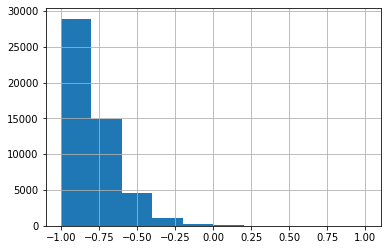

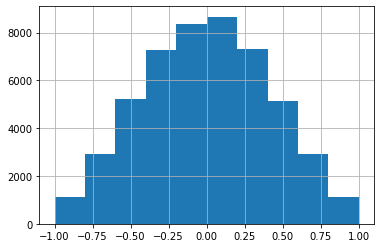

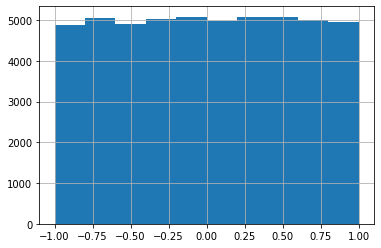

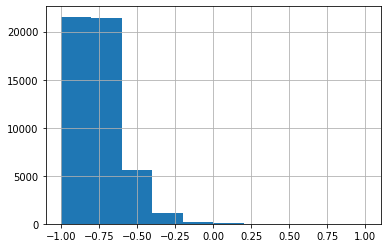

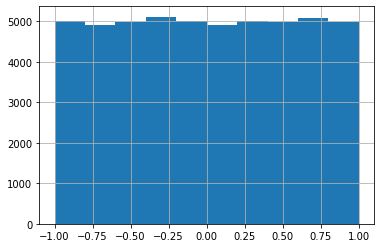

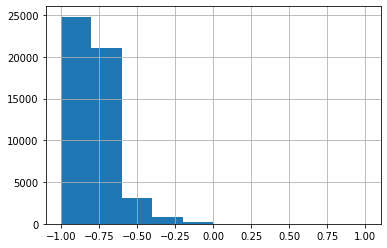

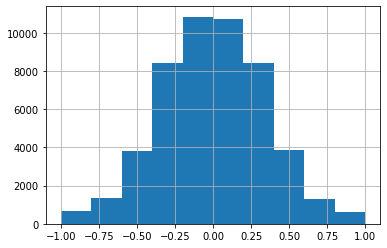

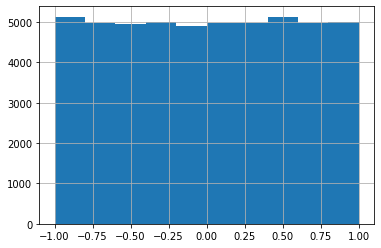

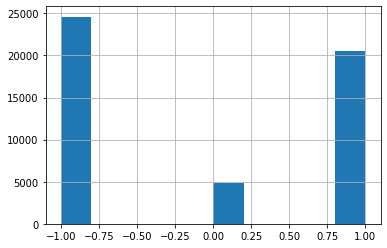

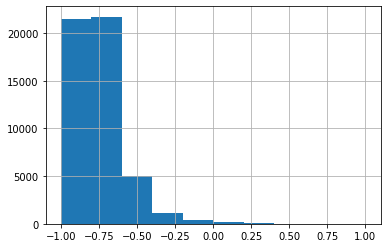

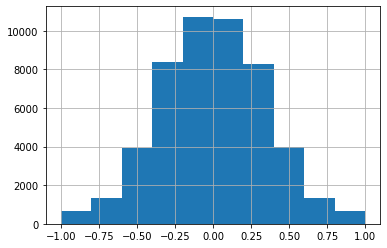

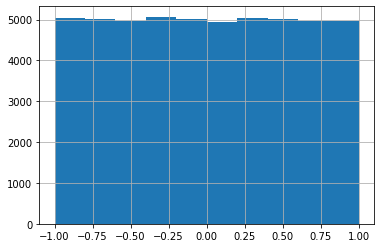

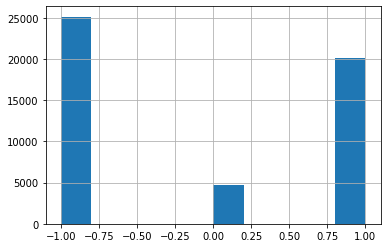

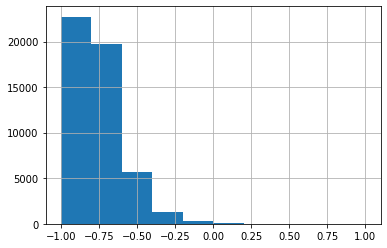

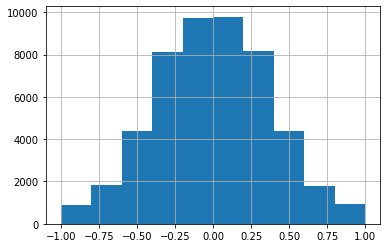

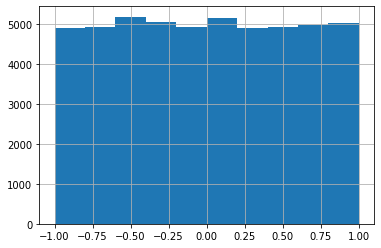

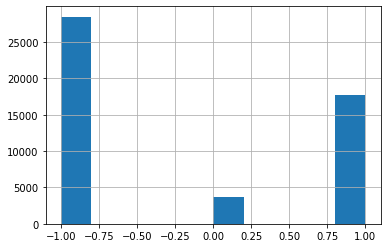

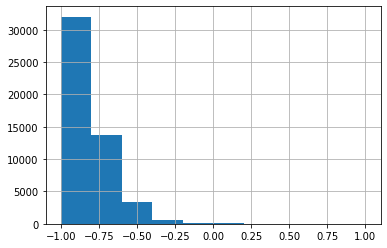

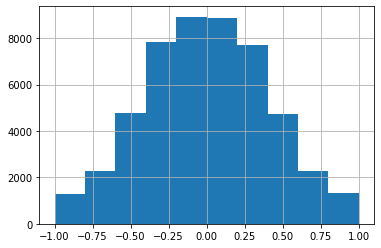

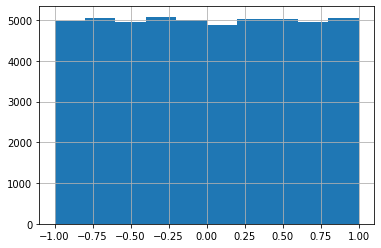

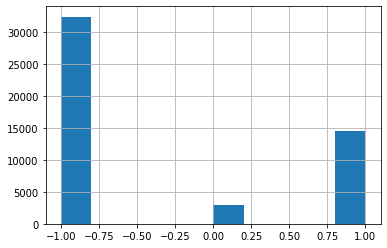

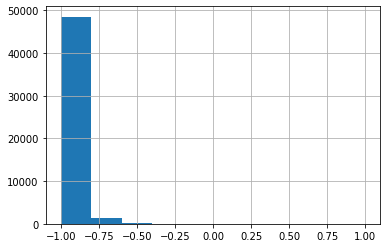

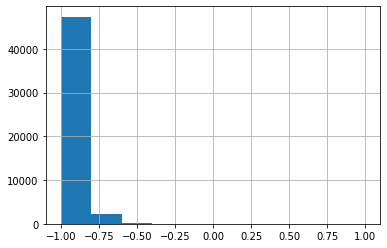

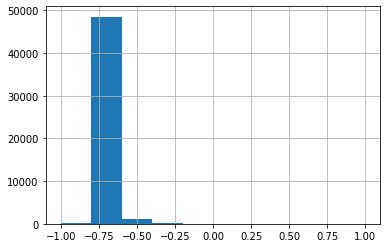

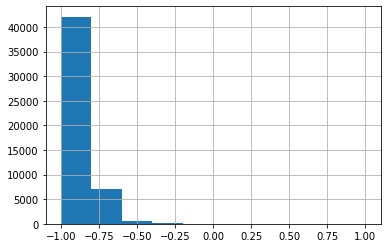

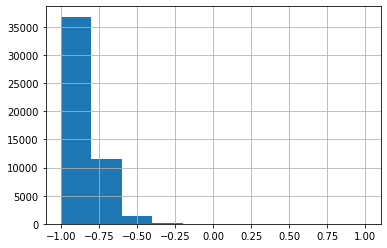

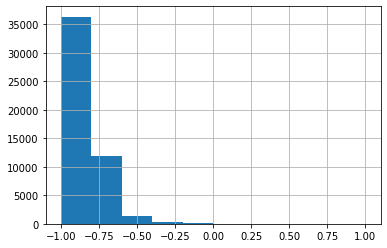

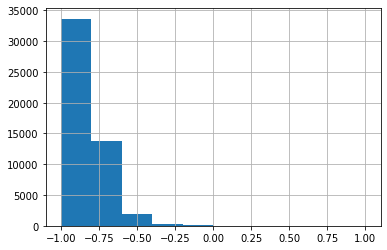

In [44]:
#for i in scaled_train_df:
#    scaled_train_df[i].hist()
#    plt.show()

In [10]:
#from time import time
#from tensorflow.keras.callbacks import TensorBoard
#tb = TensorBoard(log_dir=f"logs\\{time()}")

## Model - 1000 Epochs at 100 Batch Size | SGD

In [5]:
model = tf.keras.Sequential()

# Adds a densely-connected layer with 300 units to the model:
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
opt = tf.keras.optimizers.SGD(lr=0.05, decay=0.010000002, momentum=0.9, nesterov=True)

#SGD is Schocastic Gradient Descent
model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.fit(x.values, np.asarray(y), epochs=1000, batch_size=100)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
50000/50000 [==============================] - 3s 51us/sample - loss: 0.2309 - mean_squared_error: 0.2309 - acc: 0.6106
Epoch 2/1000
50000/50000 [==============================] - 3s 57us/sample - loss: 0.2245 - mean_squared_error: 0.2245 - acc: 0.6317
Epoch 3/1000
50000/50000 [==============================] - 3s 67us/sample - loss: 0.2224 - mean_squared_error: 0.2224 - acc: 0.6385
Epoch 4/1000
50000/50000 [==============================] - 4s 73us/sample - loss: 0.2210 - mean_squared_error: 0.2210 - acc: 0.6441
Epoch 5/1000
50000/50000 [==============================] - 3s 63us/sample - loss: 0.2201 - mean_squared_error: 0.2201 - acc: 0.6448
Epoch 6/1000
50000/50000 [==============================] - 4s 80us/sample - loss: 0.2195 - mean_squared_error: 0.2195 - acc: 0.6493
Epoch 7/1000
50000/50000 [==============================] - 3s 64us/sample - loss: 0.2190 - mean_squared_e

50000/50000 [==============================] - 3s 67us/sample - loss: 0.2133 - mean_squared_error: 0.2133 - acc: 0.6674
Epoch 58/1000
50000/50000 [==============================] - 3s 68us/sample - loss: 0.2133 - mean_squared_error: 0.2133 - acc: 0.6670
Epoch 59/1000
50000/50000 [==============================] - 3s 67us/sample - loss: 0.2133 - mean_squared_error: 0.2133 - acc: 0.6671
Epoch 60/1000
50000/50000 [==============================] - 3s 66us/sample - loss: 0.2132 - mean_squared_error: 0.2132 - acc: 0.6681
Epoch 61/1000
50000/50000 [==============================] - 3s 64us/sample - loss: 0.2132 - mean_squared_error: 0.2132 - acc: 0.6670
Epoch 62/1000
50000/50000 [==============================] - 3s 58us/sample - loss: 0.2132 - mean_squared_error: 0.2132 - acc: 0.6666
Epoch 63/1000
50000/50000 [==============================] - 3s 59us/sample - loss: 0.2131 - mean_squared_error: 0.2131 - acc: 0.6672
Epoch 64/1000
50000/50000 [==============================] - 4s 70us/sample 

50000/50000 [==============================] - 4s 73us/sample - loss: 0.2118 - mean_squared_error: 0.2118 - acc: 0.6716
Epoch 118/1000
50000/50000 [==============================] - 3s 63us/sample - loss: 0.2118 - mean_squared_error: 0.2118 - acc: 0.6709
Epoch 119/1000
50000/50000 [==============================] - 3s 70us/sample - loss: 0.2118 - mean_squared_error: 0.2118 - acc: 0.6718
Epoch 120/1000
50000/50000 [==============================] - 3s 58us/sample - loss: 0.2118 - mean_squared_error: 0.2118 - acc: 0.6715
Epoch 121/1000
50000/50000 [==============================] - 3s 60us/sample - loss: 0.2117 - mean_squared_error: 0.2117 - acc: 0.6717
Epoch 122/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 0.2117 - mean_squared_error: 0.2117 - acc: 0.6712
Epoch 123/1000
50000/50000 [==============================] - 3s 63us/sample - loss: 0.2117 - mean_squared_error: 0.2117 - acc: 0.6723
Epoch 124/1000
50000/50000 [==============================] - 3s 65us/

50000/50000 [==============================] - 3s 65us/sample - loss: 0.2110 - mean_squared_error: 0.2110 - acc: 0.6733
Epoch 178/1000
50000/50000 [==============================] - 4s 78us/sample - loss: 0.2110 - mean_squared_error: 0.2110 - acc: 0.6731
Epoch 179/1000
50000/50000 [==============================] - 3s 60us/sample - loss: 0.2110 - mean_squared_error: 0.2110 - acc: 0.6734
Epoch 180/1000
50000/50000 [==============================] - 3s 63us/sample - loss: 0.2110 - mean_squared_error: 0.2110 - acc: 0.6730
Epoch 181/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 0.2109 - mean_squared_error: 0.2109 - acc: 0.6738
Epoch 182/1000
50000/50000 [==============================] - 3s 57us/sample - loss: 0.2109 - mean_squared_error: 0.2109 - acc: 0.6740
Epoch 183/1000
50000/50000 [==============================] - 3s 62us/sample - loss: 0.2109 - mean_squared_error: 0.2109 - acc: 0.6735
Epoch 184/1000
50000/50000 [==============================] - 3s 63us/

50000/50000 [==============================] - 3s 58us/sample - loss: 0.2104 - mean_squared_error: 0.2104 - acc: 0.6751
Epoch 238/1000
50000/50000 [==============================] - 3s 58us/sample - loss: 0.2104 - mean_squared_error: 0.2104 - acc: 0.6762
Epoch 239/1000
50000/50000 [==============================] - 3s 58us/sample - loss: 0.2104 - mean_squared_error: 0.2104 - acc: 0.6755
Epoch 240/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 0.2104 - mean_squared_error: 0.2104 - acc: 0.6755
Epoch 241/1000
50000/50000 [==============================] - 3s 58us/sample - loss: 0.2104 - mean_squared_error: 0.2104 - acc: 0.6757
Epoch 242/1000
50000/50000 [==============================] - 3s 58us/sample - loss: 0.2103 - mean_squared_error: 0.2103 - acc: 0.6752
Epoch 243/1000
50000/50000 [==============================] - 3s 64us/sample - loss: 0.2103 - mean_squared_error: 0.2103 - acc: 0.6755
Epoch 244/1000
50000/50000 [==============================] - 3s 64us/

50000/50000 [==============================] - 3s 51us/sample - loss: 0.2099 - mean_squared_error: 0.2099 - acc: 0.6771
Epoch 298/1000
50000/50000 [==============================] - 2s 50us/sample - loss: 0.2099 - mean_squared_error: 0.2099 - acc: 0.6766
Epoch 299/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 0.2099 - mean_squared_error: 0.2099 - acc: 0.6768
Epoch 300/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 0.2099 - mean_squared_error: 0.2099 - acc: 0.6767
Epoch 301/1000
50000/50000 [==============================] - 3s 53us/sample - loss: 0.2099 - mean_squared_error: 0.2099 - acc: 0.6767
Epoch 302/1000
50000/50000 [==============================] - 3s 59us/sample - loss: 0.2099 - mean_squared_error: 0.2099 - acc: 0.6765
Epoch 303/1000
50000/50000 [==============================] - 3s 61us/sample - loss: 0.2099 - mean_squared_error: 0.2099 - acc: 0.6772
Epoch 304/1000
50000/50000 [==============================] - 3s 62us/

50000/50000 [==============================] - 2s 47us/sample - loss: 0.2096 - mean_squared_error: 0.2096 - acc: 0.6767
Epoch 358/1000
50000/50000 [==============================] - 2s 48us/sample - loss: 0.2096 - mean_squared_error: 0.2096 - acc: 0.6768
Epoch 359/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 0.2096 - mean_squared_error: 0.2096 - acc: 0.6777
Epoch 360/1000
50000/50000 [==============================] - 3s 51us/sample - loss: 0.2096 - mean_squared_error: 0.2096 - acc: 0.6775
Epoch 361/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 0.2095 - mean_squared_error: 0.2095 - acc: 0.6777
Epoch 362/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 0.2095 - mean_squared_error: 0.2095 - acc: 0.6779
Epoch 363/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 0.2095 - mean_squared_error: 0.2095 - acc: 0.6776
Epoch 364/1000
50000/50000 [==============================] - 3s 50us/

50000/50000 [==============================] - 2s 47us/sample - loss: 0.2092 - mean_squared_error: 0.2092 - acc: 0.6789
Epoch 418/1000
50000/50000 [==============================] - 2s 46us/sample - loss: 0.2092 - mean_squared_error: 0.2092 - acc: 0.6784
Epoch 419/1000
50000/50000 [==============================] - 2s 45us/sample - loss: 0.2092 - mean_squared_error: 0.2092 - acc: 0.6782
Epoch 420/1000
50000/50000 [==============================] - 2s 45us/sample - loss: 0.2092 - mean_squared_error: 0.2092 - acc: 0.6779
Epoch 421/1000
50000/50000 [==============================] - 2s 46us/sample - loss: 0.2092 - mean_squared_error: 0.2092 - acc: 0.6788
Epoch 422/1000
50000/50000 [==============================] - 2s 45us/sample - loss: 0.2092 - mean_squared_error: 0.2092 - acc: 0.6782
Epoch 423/1000
50000/50000 [==============================] - 3s 57us/sample - loss: 0.2092 - mean_squared_error: 0.2092 - acc: 0.6779
Epoch 424/1000
50000/50000 [==============================] - 3s 50us/

50000/50000 [==============================] - 3s 55us/sample - loss: 0.2090 - mean_squared_error: 0.2090 - acc: 0.6789
Epoch 478/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 0.2090 - mean_squared_error: 0.2090 - acc: 0.6789
Epoch 479/1000
50000/50000 [==============================] - 3s 51us/sample - loss: 0.2090 - mean_squared_error: 0.2090 - acc: 0.6794
Epoch 480/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 0.2090 - mean_squared_error: 0.2090 - acc: 0.6785
Epoch 481/1000
50000/50000 [==============================] - 2s 48us/sample - loss: 0.2089 - mean_squared_error: 0.2089 - acc: 0.6789
Epoch 482/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 0.2089 - mean_squared_error: 0.2089 - acc: 0.6791
Epoch 483/1000
50000/50000 [==============================] - 2s 45us/sample - loss: 0.2089 - mean_squared_error: 0.2089 - acc: 0.6790
Epoch 484/1000
50000/50000 [==============================] - 2s 49us/

50000/50000 [==============================] - 2s 47us/sample - loss: 0.2087 - mean_squared_error: 0.2087 - acc: 0.6793
Epoch 538/1000
50000/50000 [==============================] - 2s 45us/sample - loss: 0.2087 - mean_squared_error: 0.2087 - acc: 0.6795
Epoch 539/1000
50000/50000 [==============================] - 2s 45us/sample - loss: 0.2087 - mean_squared_error: 0.2087 - acc: 0.6801
Epoch 540/1000
50000/50000 [==============================] - 2s 45us/sample - loss: 0.2087 - mean_squared_error: 0.2087 - acc: 0.6797
Epoch 541/1000
50000/50000 [==============================] - 2s 46us/sample - loss: 0.2087 - mean_squared_error: 0.2087 - acc: 0.6793
Epoch 542/1000
50000/50000 [==============================] - 2s 46us/sample - loss: 0.2087 - mean_squared_error: 0.2087 - acc: 0.6798
Epoch 543/1000
50000/50000 [==============================] - 2s 49us/sample - loss: 0.2087 - mean_squared_error: 0.2087 - acc: 0.6796
Epoch 544/1000
50000/50000 [==============================] - 3s 53us/

50000/50000 [==============================] - 3s 53us/sample - loss: 0.2085 - mean_squared_error: 0.2085 - acc: 0.6801
Epoch 598/1000
50000/50000 [==============================] - 3s 57us/sample - loss: 0.2085 - mean_squared_error: 0.2085 - acc: 0.6794
Epoch 599/1000
50000/50000 [==============================] - 3s 61us/sample - loss: 0.2085 - mean_squared_error: 0.2085 - acc: 0.6798
Epoch 600/1000
50000/50000 [==============================] - 3s 52us/sample - loss: 0.2085 - mean_squared_error: 0.2085 - acc: 0.6801
Epoch 601/1000
50000/50000 [==============================] - 3s 60us/sample - loss: 0.2085 - mean_squared_error: 0.2085 - acc: 0.6798
Epoch 602/1000
50000/50000 [==============================] - 2s 47us/sample - loss: 0.2085 - mean_squared_error: 0.2085 - acc: 0.6798
Epoch 603/1000
50000/50000 [==============================] - 3s 51us/sample - loss: 0.2085 - mean_squared_error: 0.2085 - acc: 0.6799
Epoch 604/1000
50000/50000 [==============================] - 3s 52us/

50000/50000 [==============================] - 3s 66us/sample - loss: 0.2083 - mean_squared_error: 0.2083 - acc: 0.6800
Epoch 658/1000
50000/50000 [==============================] - 3s 62us/sample - loss: 0.2083 - mean_squared_error: 0.2083 - acc: 0.6803
Epoch 659/1000
50000/50000 [==============================] - 3s 64us/sample - loss: 0.2083 - mean_squared_error: 0.2083 - acc: 0.6801
Epoch 660/1000
50000/50000 [==============================] - 3s 66us/sample - loss: 0.2083 - mean_squared_error: 0.2083 - acc: 0.6799
Epoch 661/1000
50000/50000 [==============================] - 3s 63us/sample - loss: 0.2083 - mean_squared_error: 0.2083 - acc: 0.6800
Epoch 662/1000
50000/50000 [==============================] - 3s 66us/sample - loss: 0.2083 - mean_squared_error: 0.2083 - acc: 0.6799
Epoch 663/1000
50000/50000 [==============================] - 3s 64us/sample - loss: 0.2083 - mean_squared_error: 0.2083 - acc: 0.6799
Epoch 664/1000
50000/50000 [==============================] - 3s 61us/

50000/50000 [==============================] - 3s 58us/sample - loss: 0.2081 - mean_squared_error: 0.2081 - acc: 0.6803
Epoch 718/1000
50000/50000 [==============================] - 3s 58us/sample - loss: 0.2081 - mean_squared_error: 0.2081 - acc: 0.6806
Epoch 719/1000
50000/50000 [==============================] - 3s 66us/sample - loss: 0.2081 - mean_squared_error: 0.2081 - acc: 0.6797
Epoch 720/1000
50000/50000 [==============================] - 3s 59us/sample - loss: 0.2081 - mean_squared_error: 0.2081 - acc: 0.6799
Epoch 721/1000
50000/50000 [==============================] - 3s 63us/sample - loss: 0.2081 - mean_squared_error: 0.2081 - acc: 0.6810
Epoch 722/1000
50000/50000 [==============================] - 4s 71us/sample - loss: 0.2081 - mean_squared_error: 0.2081 - acc: 0.6804
Epoch 723/1000
50000/50000 [==============================] - 3s 67us/sample - loss: 0.2081 - mean_squared_error: 0.2081 - acc: 0.6802
Epoch 724/1000
50000/50000 [==============================] - 3s 64us/

50000/50000 [==============================] - 3s 59us/sample - loss: 0.2079 - mean_squared_error: 0.2079 - acc: 0.6806
Epoch 778/1000
50000/50000 [==============================] - 3s 59us/sample - loss: 0.2079 - mean_squared_error: 0.2079 - acc: 0.6803
Epoch 779/1000
50000/50000 [==============================] - 3s 59us/sample - loss: 0.2079 - mean_squared_error: 0.2079 - acc: 0.6805
Epoch 780/1000
50000/50000 [==============================] - 3s 58us/sample - loss: 0.2079 - mean_squared_error: 0.2079 - acc: 0.6807
Epoch 781/1000
50000/50000 [==============================] - 3s 62us/sample - loss: 0.2079 - mean_squared_error: 0.2079 - acc: 0.6806
Epoch 782/1000
50000/50000 [==============================] - 3s 59us/sample - loss: 0.2079 - mean_squared_error: 0.2079 - acc: 0.6807
Epoch 783/1000
50000/50000 [==============================] - 3s 59us/sample - loss: 0.2079 - mean_squared_error: 0.2079 - acc: 0.6809
Epoch 784/1000
50000/50000 [==============================] - 3s 62us/

50000/50000 [==============================] - 3s 58us/sample - loss: 0.2077 - mean_squared_error: 0.2077 - acc: 0.6811
Epoch 838/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 0.2077 - mean_squared_error: 0.2077 - acc: 0.6813
Epoch 839/1000
50000/50000 [==============================] - 3s 60us/sample - loss: 0.2077 - mean_squared_error: 0.2077 - acc: 0.6809
Epoch 840/1000
50000/50000 [==============================] - 3s 60us/sample - loss: 0.2077 - mean_squared_error: 0.2077 - acc: 0.6808
Epoch 841/1000
50000/50000 [==============================] - 3s 60us/sample - loss: 0.2077 - mean_squared_error: 0.2077 - acc: 0.6812
Epoch 842/1000
50000/50000 [==============================] - 3s 63us/sample - loss: 0.2077 - mean_squared_error: 0.2077 - acc: 0.6810
Epoch 843/1000
50000/50000 [==============================] - 3s 57us/sample - loss: 0.2077 - mean_squared_error: 0.2077 - acc: 0.6808
Epoch 844/1000
50000/50000 [==============================] - 3s 57us/

50000/50000 [==============================] - 3s 67us/sample - loss: 0.2076 - mean_squared_error: 0.2076 - acc: 0.6815
Epoch 898/1000
50000/50000 [==============================] - 4s 77us/sample - loss: 0.2076 - mean_squared_error: 0.2076 - acc: 0.6811
Epoch 899/1000
50000/50000 [==============================] - 3s 61us/sample - loss: 0.2076 - mean_squared_error: 0.2076 - acc: 0.6817
Epoch 900/1000
50000/50000 [==============================] - 3s 57us/sample - loss: 0.2076 - mean_squared_error: 0.2076 - acc: 0.6813
Epoch 901/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 0.2076 - mean_squared_error: 0.2076 - acc: 0.6812
Epoch 902/1000
50000/50000 [==============================] - 3s 58us/sample - loss: 0.2076 - mean_squared_error: 0.2076 - acc: 0.6814
Epoch 903/1000
50000/50000 [==============================] - 3s 56us/sample - loss: 0.2076 - mean_squared_error: 0.2076 - acc: 0.6813
Epoch 904/1000
50000/50000 [==============================] - 3s 60us/

50000/50000 [==============================] - 3s 54us/sample - loss: 0.2075 - mean_squared_error: 0.2075 - acc: 0.6814
Epoch 958/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 0.2074 - mean_squared_error: 0.2074 - acc: 0.6817
Epoch 959/1000
50000/50000 [==============================] - 3s 58us/sample - loss: 0.2074 - mean_squared_error: 0.2074 - acc: 0.6816
Epoch 960/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 0.2074 - mean_squared_error: 0.2074 - acc: 0.6816
Epoch 961/1000
50000/50000 [==============================] - 3s 54us/sample - loss: 0.2074 - mean_squared_error: 0.2074 - acc: 0.6812
Epoch 962/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 0.2074 - mean_squared_error: 0.2074 - acc: 0.6818
Epoch 963/1000
50000/50000 [==============================] - 3s 55us/sample - loss: 0.2074 - mean_squared_error: 0.2074 - acc: 0.6813
Epoch 964/1000
50000/50000 [==============================] - 3s 53us/

In [13]:
#AUC Code
from sklearn.metrics import roc_auc_score
print("AUC:", roc_auc_score(np.asarray(y), model.predict(x.values)))

AUC: 0.7385411588583997


In [ ]:
# AUC code
#t = np.asarray(scaled_train_df.values)
#pred = np.asarray(y)

In [9]:
#Code from An to try for AUC
#predictions = model.predict(x)
#from sklearn import metrics
#fpr, tpr, thresholds = metrics.roc_curve(y_true=np.asarray(y), y_score=predictions , pos_label=1)

In [ ]:
#from sklearn import metrics
#fpr, tpr, thresholds = metrics.roc_curve(t, pred, pos_label=2)

## Compile

In [12]:
#SGD is Schocastic Gradient Descent
#model.compile(optimizer='sgd',
#              loss='mean_squared_error',
#              metrics=['mean_squared_error'])

opt = tf.keras.optimizers.SGD(lr=0.05)
#model.compile(optimizer = opt,
#              loss='mean_squared_error',
#              metrics=['mean_squared_error'])

#Trying the Classification way
#from sklearn import metrics
#from keras import backend as K

#def auc(y_true, y_pred):
#    auc = tf.metrics.auc(y_true, y_pred)[1]
#    K.get_session().run(tf.local_variables_initializer())
#    return auc   
#model.compile(optimizer=opt,
#              loss=tf.keras.losses.categorical_crossentropy,
#              metrics=[auc])
#above was trying to get auc metric

model.compile(optimizer=opt,
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['MSE', 'accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model = tf.keras.Sequential()

# 300 represents number of neurons - 5 layers
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(2, activation='sigmoid'))


## Fit

In [13]:
#trying the Classification way
model.fit(scaled_train_df.values, np.asarray(y), epochs=10, batch_size=100, callbacks=[tb])

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50000/50000 [==============================] - 2s 45us/sample - loss: 0.6864 - mean_squared_error: 0.2467 - acc: 0.5452
Epoch 2/10
50000/50000 [==============================] - 2s 49us/sample - loss: 0.6769 - mean_squared_error: 0.2420 - acc: 0.5702
Epoch 3/10
50000/50000 [==============================] - 3s 57us/sample - loss: 0.6708 - mean_squared_error: 0.2392 - acc: 0.5794
Epoch 4/10
50000/50000 [==============================] - 3s 55us/sample - loss: 0.6669 - mean_squared_error: 0.2373 - acc: 0.5878
Epoch 5/10
50000/50000 [==============================] - 3s 55us/sample - loss: 0.6620 - mean_squared_error: 0.2351 - acc: 0.5956
Epoch 6/10
50000/50000 [==============================] - 3s 55us/sample - loss: 0.6595 - mean_squared_error: 0.2339 - acc: 0.6000
Epoch 7/10
50000/50000 [==============================] - 3s 57us/sample - loss: 0.6578 - mean_squared_error: 0.2331 - acc: 0.6017
Epoch 8/10
50000/50000 [===========

## Validate

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, np.asarray(y), test_size=0.20, random_state=1776)

In [15]:
model_final = tf.keras.Sequential()
# Adds a densely-connected layer with 300 units to the model:

model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(300, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model_final.compile(optimizer=tf.train.GradientDescentOptimizer(0.001),
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [18]:
model_final.fit(x_train.values, y_train, validation_data=(x_test,y_test), epochs=10, batch_size=100, callbacks=[tb])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 0s 7us/sample - loss: 0.3989 - mean_squared_error: 0.3989 - val_loss: 0.3977 - val_mean_squared_error: 0.3977
Epoch 2/10
40000/40000 [==============================] - 0s 7us/sample - loss: 0.3989 - mean_squared_error: 0.3989 - val_loss: 0.3977 - val_mean_squared_error: 0.3977
Epoch 3/10
40000/40000 [==============================] - 0s 7us/sample - loss: 0.3989 - mean_squared_error: 0.3989 - val_loss: 0.3977 - val_mean_squared_error: 0.3977
Epoch 4/10
40000/40000 [==============================] - 0s 7us/sample - loss: 0.3989 - mean_squared_error: 0.3989 - val_loss: 0.3977 - val_mean_squared_error: 0.3977
Epoch 5/10
40000/40000 [==============================] - 0s 7us/sample - loss: 0.3989 - mean_squared_error: 0.3989 - val_loss: 0.3977 - val_mean_squared_error: 0.3977
Epoch 6/10
40000/40000 [==============================] - 0s 7us/sample - loss: 0.3989 - mean_squared_error: 0